<a href="https://colab.research.google.com/github/JimQuejado/Quejado-CPE019-Emerging-Technology-2/blob/main/7.%20Quejado_Assignment_5_2_Build_and_Apply_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **CPE019 -Assignment 5.2: Build and Apply Multilayer Perceptron**

---


**Name:** QUEJADO,  Jimlord M. <br>
**Course and Section:** CPE019-CPE32S3 <br>
**Date of Submission**: March 26, 2024<br>
**Instructor:** Engr. Roman Richard<br>

---


## Objectives: <br>

In this assignment, you are task to build a multilayer perceptron model. The following are the requirements:

* Choose any dataset <br>
* Explain the problem you are trying to solve<br>
* Create your own model<br>
* Evaluate the accuracy of your model<br>





---


## **About the Data Set:** <br>




### **Dry Bean Data Set**


Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.



---


**Dataset Characteristics**<br>
Multivariate<br>

**Subject Area**<br>
Biology<br>

**Associated Tasks**<br>
Classification<br>

**Feature Type**<br>
Integer, Real<br>

**# Instances**<br>
13611

**# Features**<br>
16<br>



---


**DOI**<br>
10.24432/C50S4B <br>

**Link** <br>
https://archive.ics.uci.edu/dataset/602/dry+bean+dataset




---


### Attribute Information:
*The following are information about the attributes in the data. Note that the sequence of the attributes below does not reflect the actual sequence in the dataset*. <br>


---


#### *Data Type: Categorical* <br>
* **Class** (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)<br>

#### *Data Type: Integer* <br>
* **Area (A)**: The area of a bean zone and the number of pixels within its boundaries. <br>
* **Convex area (C)**: Number of pixels in the smallest convex polygon that can contain the area of a bean seed.<br>

#### *Data Type: Continous* <br>
* **Perimeter (P)**: Bean circumference is defined as the length of its border. <br>
* **Major axis length (L)**: The distance between the ends of the longest line that can be drawn from a bean.<br>
* **Minor axis length (l)**: The longest line that can be drawn from the bean while standing perpendicular to the main axis.<br>
* **Aspect ratio (K)**: Defines the relationship between L and l.<br>
* **Eccentricity (Ec)**: Eccentricity of the ellipse having the same moments as the region.<br>

* **Equivalent diameter (Ed)**: The diameter of a circle having the same area as a bean seed area.<br>
* **Extent (Ex)**: The ratio of the pixels in the bounding box to the bean area.<br>
* **Solidity (S)**: Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.<br>
* **Roundness (R)**: Calculated with the following formula: (4piA)/(P^2)<br>
* **Compactness (CO)**: Measures the roundness of an object: Ed/L<br>
* **ShapeFactor1 (SF1)**<br>
* **ShapeFactor2 (SF2)**<br>
* **ShapeFactor3 (SF3)**<br>
* **ShapeFactor4 (SF4)**<br>




## Scenario / Problem

Create a Multi Perceptron model that can classify the following beans: <br>

- **BARBUNYA**    
- **BOMBAY**      
- **CALI**        
- **DERMASON**    
- **HOROZ**       
- **SEKER**       
- **SIRA**



## Data Cleaning and Preprocessing

### Loading the Dataset

In this section, the data set from UC Irvine Machine Learning Repository was imported to the notebook.

In [198]:
#Importing Libraries
import pandas as pd
import numpy as np

In [199]:
#Connecting to GoogleDrive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [200]:
#Loading the data
data_path = "/content/drive/MyDrive/CPE019 - HOA 5.2 /Dry_Bean_Dataset.csv"
BeanDF = pd.read_csv(data_path)

In [201]:
#checking if data set is properly loaded
BeanDF.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [340]:
BeanDF.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


<font color='red'> **Remarks:**  </font> <br>
As shown above it can be seen that the data needs preprocessing. The data has not yet been standardized, balanced, filtered, and some data are needed to be converted.  

### Checking Missing Entries and data type

#### Checking  Null and dtype in each attributes

Using the .info() to check the count the number of non-null and dtype of each attribute.

In [202]:
BeanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

<font color='red'> **Remarks:**  </font> <br>
There are no missing values which reflected to the description in the website. As shown, the Class is an object, and the convexArea and Area are int64. As shown in the .head() command, the Class must be converted to numerical and the data type of the ConvexArea and Area converted to float. The reason of doing this is for better efficiency. Having a homogenous data requires less computations resulting to less potential errors or any other unexpected behaviors.

#### Changing attributes dtype int to float

In this section, the int data type of the two variables namely Area and ConvexArea  

In [203]:
#Changing fromt int to float
BeanDF['Area'] = BeanDF['Area'].astype(float)
BeanDF['ConvexArea'] = BeanDF['ConvexArea'].astype(float)

#Verifying
print(BeanDF['Area'].dtype)
print( BeanDF['ConvexArea'].dtype)

float64
float64


###Proccessing the Class Attribute


In this section, I balanced the dataset and changed the categorical to numberical values.

#### Checking the number of unique value in each class

In [204]:
count = BeanDF['Class'].value_counts()

print("Counts of unique values in the 'Class' column:")
print(count)


Counts of unique values in the 'Class' column:
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


In [205]:
#checking the ratio
print(3546/522)

6.793103448275862


<font color ='red'> **Remarks:** <font>

The number of data in each class are imbalanced. As shown the ratio of bombay and dermason is approximately 6.8 which is quite large. I decided to **undersample** the data in order to remove this imbalance. Although there are trade-offs in this approach, where some important features might be lost, the objective of this activity is to implement MLP without a minimum requirement of accuracy.


#### Undersampling the dataset

In this section, each attribute will be undersampled to the number of bombay values


In [206]:
minority = BeanDF['Class'].value_counts().min()

# Undersample each class to match the size of the minority class
beanDF_balanced = BeanDF.groupby('Class').apply(lambda x: x.sample(minority)).reset_index(drop=True)

In [207]:
count = beanDF_balanced['Class'].value_counts()
print(count)

BARBUNYA    522
BOMBAY      522
CALI        522
DERMASON    522
HOROZ       522
SEKER       522
SIRA        522
Name: Class, dtype: int64


#### Changing the Values of Class to Numerical Value

In this section the values in 'class' attribute would be changed into:


```
BARBUNYA    0
BOMBAY      1
CALI        2
DERMASON    3
HOROZ       4
SEKER       5
SIRA        6
```

In [208]:
#Checking the unique values
print(beanDF_balanced['Class'].unique())

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


In [209]:
#mapping for the new labels
new_Label = {
  'BARBUNYA': 0,
  'BOMBAY': 1,
  'CALI': 2,
  'DERMASON': 3,
  'HOROZ': 4,
  'SEKER':5,
  'SIRA':6
}

beanDF_balanced['Class'] = beanDF_balanced['Class'].map(new_Label)

In [210]:
#Checking the unique values
print(beanDF_balanced['Class'].unique())

[0 1 2 3 4 5 6]


<font color = 'Red'> **Remarks:** <font>

By changing the class attribute, the data would compatible to MLP as it requires a numerical input and would also produce numerical output [1].

---
Reference:

[1] S. Abirami and P. Chitra, “Energy-efficient edge based real-time healthcare support system,” in Advances in Computers, 2020, pp. 339–368. doi: 10.1016/bs.adcom.2019.09.007.

### Splitting the DataSet

In this section, the data set is divided into two: the training and tesing data set




In [211]:
from sklearn.model_selection import train_test_split

#decalring the input and target variables
X = beanDF_balanced.loc[:,"Area": "ShapeFactor4"]
y = beanDF_balanced['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [212]:
#checking if the number is balanced in each category
print("y_train")
print(y_train.value_counts())

print("y_test")
print(y_test.value_counts())

y_train
5    418
0    418
1    418
2    418
6    417
3    417
4    417
Name: Class, dtype: int64
y_test
6    105
3    105
4    105
1    104
0    104
2    104
5    104
Name: Class, dtype: int64


<font color = 'Red'> **Remarks:** <font>

I used the stratify parmeter in the train_test_split inorder to ensure that the proportion of each class would stay the same [2]. I did this so that there will be no imbalance in my testing and training data set.



---
Reference:<br>
[2] GfG, “How to Implement Stratified Sampling with Scikit-Learn,” GeeksforGeeks, Dec. 26, 2023. https://www.geeksforgeeks.org/how-to-implement-stratified-sampling-with-scikit-learn/

---

<br>


### Standardizing the Data

In this section, I applied feature scaling in the x train and test dataframe specifically standardization. The reason is that the independent variables of my data are not yet standardized. By applying this step, I can scale the features in my data frames to have a mean of 0 and a std of 1 [3]. This enables my data frame to be useable on creating a machine learning model.
<br><br>

---

Reference:<br>
[3]  R. Vashisht, “When to perform a Feature Scaling?,” Atoti Community, Feb. 14, 2023. https://www.atoti.io/articles/when-to-perform-a-feature-scaling/#:~:text=What%20is%20Feature%20Scaling%3F,during%20the%20data%20preprocessing%20step.

---

In [213]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


---
## **Multilayer Perceptron**


### Importing the Libaries


In this section, the tensorflow library was imported in order to create the Multilayer Perceptron.

In [327]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

### Creating the Model

In this section, the model was was created by defining the MLP model architecture. To put it simply, the hidden layers are created in this section

In [328]:
model = Sequential([
  Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
  Dense(32, activation='relu'),
  Dense(7, activation='softmax')
])

<Font Color = 'red'> **Remarks:** <font> <br>

The activiton that was used was relu for the first 2 layers as it is efficient and easy to implement and it actaully widely used as in neural networks since its performance is proven to be better[11].

On the other hand, the softmax is commonly used in multi-class classification tasks output layer[11]. In my data set, there are 7 class that are being used and in my implementation, it is also on the last layer.


---
Reference: <br>
[11] N. Buhl, “Activation Functions in Neural Networks: With 15 examples,” Oct. 17, 2023. https://encord.com/blog/activation-functions-neural-networks/#:~:text=Activation%20functions%20play%20a%20crucial,and%20numerous%20non-linear%20variants.


---
<br>

### Compiling the Model

In [329]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<Font Color = 'red'> **Remarks:** <font> <br>

***.compile()*** was used in this part of the code.These three are said to be the important paramters[8]:

- **optimizer**: the optimization algorithm used was adam as it combines the advantages of the two other optimizers namely - AdaGrad and RMSProp[9]. This is the reason I used this instead of the other as compared to others as it gives both the adaptive and efficient advantages of the combined optimizations.

- **loss**: the loss function is for the error between the model and true labels. In my case I used 'sparse_categorical_crossentropy'as it is used for multi-class classification with integer labels[10].  In my case, there are 7 classes thus using this would be better than the other loss functions.

- **metrics**: this is to monitor the performance of the model. I used accuracy as it gives the accuracy of the model's classification.
<br>
---
**References**: <br>
[8] “Keras - Model Compilation.” https://www.tutorialspoint.com/keras/keras_model_compilation.htm

[9] A. Gupta, “A comprehensive guide on optimizers in deep learning,” Analytics Vidhya, Jan. 23, 2024. https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/

[10] K. Team, “Keras documentation: Losses.” https://keras.io/api/losses/

---
<br>

### **Training the Model**

In this section of the code, the model was trained using the .fit() function. It was stored in a variable history to create

In [330]:
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
74/74 [==============================] - 1s 7ms/step - loss: 1.3229 - accuracy: 0.5646 - val_loss: 0.8706 - val_accuracy: 0.7812
Epoch 2/20
74/74 [==============================] - 0s 4ms/step - loss: 0.6501 - accuracy: 0.8268 - val_loss: 0.4849 - val_accuracy: 0.8410
Epoch 3/20
74/74 [==============================] - 0s 4ms/step - loss: 0.4162 - accuracy: 0.8597 - val_loss: 0.3820 - val_accuracy: 0.8547
Epoch 4/20
74/74 [==============================] - 0s 4ms/step - loss: 0.3377 - accuracy: 0.8820 - val_loss: 0.3408 - val_accuracy: 0.8701
Epoch 5/20
74/74 [==============================] - 0s 4ms/step - loss: 0.2908 - accuracy: 0.9038 - val_loss: 0.3072 - val_accuracy: 0.8889
Epoch 6/20
74/74 [==============================] - 0s 4ms/step - loss: 0.2607 - accuracy: 0.9187 - val_loss: 0.2873 - val_accuracy: 0.9111
Epoch 7/20
74/74 [==============================] - 0s 4ms/step - loss: 0.2367 - accuracy: 0.9256 - val_loss: 0.2761 - val_accuracy: 0.9128
Epoch 8/20
74/74 [==

<Font Color = 'green'> **Observation:** <font> <br>

I noticed that it was stored in a variable called history. Upon research, I learned that this history basically holds the this variable is from Keras wherein it record all the training history or records for each **epoch**[6]. In this case, the history would have metrics namey:

['accuracy', 'loss', 'val_accuracy', 'val_loss']


Epoch on the other hand is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset while batch_size refers to the number of samples that will be propagated through the network at a time before the model's weights are updated[7].

<br>

<Font Color = 'red'> **Remarks:** <font> <br>

The epoch I used in this code is an arbitrary value where I wanted to see if it is enough value. The same goes with other parameters such as the batch size and validation split.

---

Reference: <br>
[6] J. Brownlee, “Display Deep learning model training History in KERAS,” MachineLearningMastery.com, Aug. 05, 2022. https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

[7] J. Brownlee, “Difference between a batch and an epoch in a neural network,” MachineLearningMastery.com, Aug. 15, 2022. https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

### Evaluating the model

In [331]:
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train)
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Training Loss: {train_loss:.4f}')

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

92/92 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9456
Training Accuracy: 0.9456
Training Loss: 0.1623
23/23 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9207
Test Accuracy: 0.9207
Test Loss: 0.1913


<Font Color = 'Green'> **Observation:**

Accuracy and loss are the two metrics that was observed in the model. Accuracy is about how the performace of the model in terms of classification. On the other hand, loss is the summation of the errors made for each sample in training or validation sets. These two are used

<Font Color = 'Red'> **Remarks:** <font>

The accuracy of the model is 92.07% on an unkown data with a loss of 0.1913. This is a good result but inorder to check whether I can still enhance this, I also tested different parameters as shown in the following codes. The goal would make it result to higher than the current scores.

---
References: <br>
[4] “Accuracy and Loss | AI Wiki.” https://machine-learning.paperspace.com/wiki/accuracy-and-loss

### Visualization

Text(0, 0.5, 'loss')

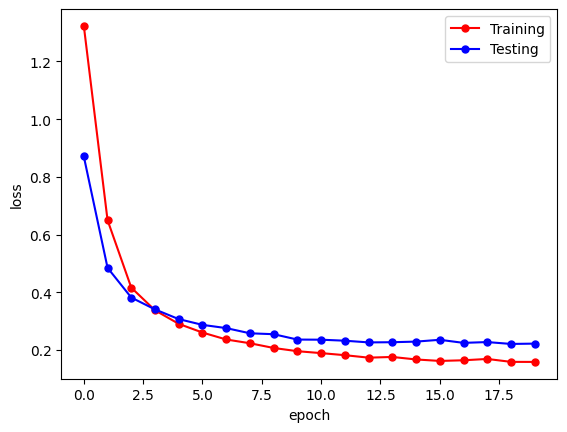

In [332]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'ro-', markersize = 5)
plt.plot(history.history['val_loss'],'bo-',markersize = 5)
plt.legend(('Training', 'Testing'))
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'Accuracy')

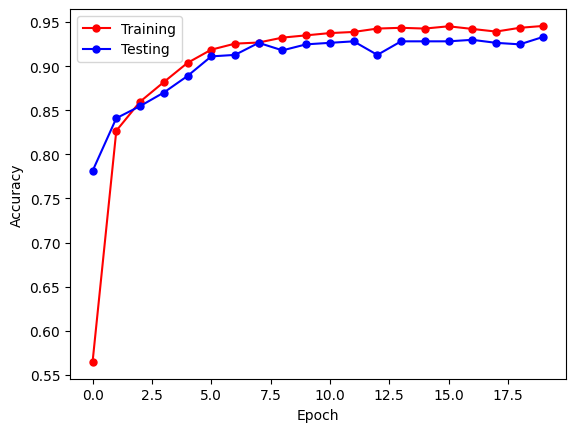

In [333]:
plt.plot(history.history['accuracy'], 'ro-', markersize = 5)
plt.plot(history.history['val_accuracy'], 'bo-',markersize = 5)
plt.legend(('Training', 'Testing'))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

<font color = 'red'> **Remarks:**

As shown in the graphs above, the model performance against an unkown data is close to the training's accuracy and the a loss that is higher compared to the training.

## Adjusting the Model Parameters

In this section, I tested different parameters so that I can have a better results than the previous.

In [334]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

optimizer = Adam(learning_rate=0.00025)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=64, validation_split=0.2)


Epoch 1/30
37/37 [==============================] - 2s 13ms/step - loss: 1.7016 - accuracy: 0.3648 - val_loss: 1.4297 - val_accuracy: 0.5675
Epoch 2/30
37/37 [==============================] - 0s 7ms/step - loss: 1.3333 - accuracy: 0.5376 - val_loss: 1.0493 - val_accuracy: 0.7231
Epoch 3/30
37/37 [==============================] - 0s 7ms/step - loss: 1.0210 - accuracy: 0.6698 - val_loss: 0.7373 - val_accuracy: 0.7726
Epoch 4/30
37/37 [==============================] - 0s 7ms/step - loss: 0.7710 - accuracy: 0.7519 - val_loss: 0.5410 - val_accuracy: 0.8034
Epoch 5/30
37/37 [==============================] - 0s 7ms/step - loss: 0.6154 - accuracy: 0.7921 - val_loss: 0.4393 - val_accuracy: 0.8188
Epoch 6/30
37/37 [==============================] - 0s 5ms/step - loss: 0.5207 - accuracy: 0.8024 - val_loss: 0.3967 - val_accuracy: 0.8342
Epoch 7/30
37/37 [==============================] - 0s 5ms/step - loss: 0.4658 - accuracy: 0.8229 - val_loss: 0.3676 - val_accuracy: 0.8547
Epoch 8/30
37/37 [=

<font color = 'Red'> **Remarks:** <br>

To adjust the model I changed the number of layers along with the neurons except for the output layer. I also changed the parameters of the optimizer to be specific the learning rate. Lastly, I changed the epoch and the batch size.

### Evaluating the Adjusted Model

In [335]:
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train)
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Training Loss: {train_loss:.4f}')

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

92/92 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9449
Training Accuracy: 0.9449
Training Loss: 0.1622
23/23 [==============================] - 0s 2ms/step - loss: 0.1827 - accuracy: 0.9234
Test Accuracy: 0.9234
Test Loss: 0.1827


<font color = 'Red'> **Remarks:** <br>

The results shows that after modifying the code, the performance of model SLIGHTLY became better.

### Visualization

Text(0, 0.5, 'loss')

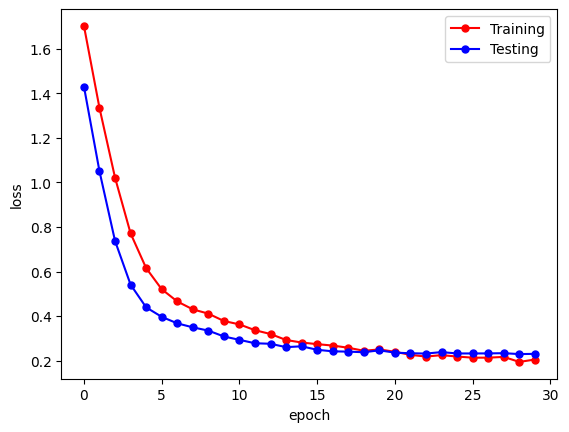

In [339]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'ro-', markersize = 5)
plt.plot(history.history['val_loss'],'bo-',markersize = 5)
plt.legend(('Training', 'Testing'))
plt.xlabel('epoch')
plt.ylabel('loss')


Text(0, 0.5, 'Accuracy')

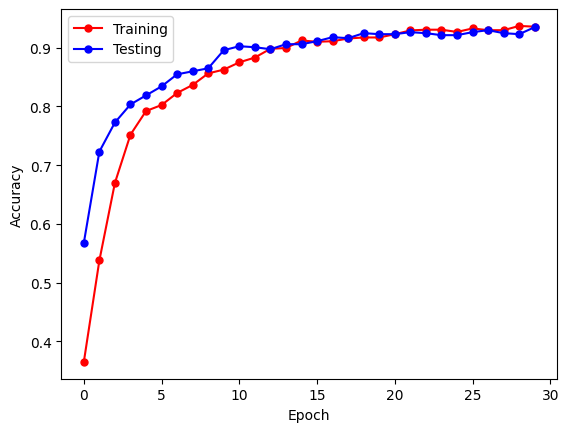

In [337]:
plt.plot(history.history['accuracy'], 'ro-', markersize = 5)
plt.plot(history.history['val_accuracy'], 'bo-',markersize = 5)
plt.legend(('Training', 'Testing'))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

<font color = 'Red'> **Remarks:** <br>

Comparing this to the previous graph before adjusting the paramters, it can be seen visually that it is better than the previous model.


## <font color = 'Blue'> **Final Remarks and Conclusions:** <br><font>

The activity aimed to do create and evaluate a multi perceptron model. In the activity, I was able to create my own multi perceptron model using a data set about dry beans from UC Irvine Machine Learning Repository. The evaluation are also done in the 2 seperate models that was created.

After conducting these I was able to conclude the following:

- Preprocessing is very important in multi perceptron model as it allowed me to have a higher accuracy score especially the standardizing the data. Without this, my accuracy would be lower than 40%.

- In order to improve the performance of my model, the balancing of data should be done differently as it a lot of features was lost when I undersampled especially to class with more than 3000 instances.

- Outliers were not removed in the pre processing as when I tried to do so, a whole class was removed (bombay)

- The testing of best parameters on creating the MLP is hard as it needs to be tested repeatedly.




<br>